# first : data preprocessing

### libraries we need

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 


### uploading the data and read it

In [28]:
data=pd.read_csv("NEO Earth Close Approaches 1500.csv")

### start understanding the data

In [29]:
data.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (km),CA DistanceMinimum (km),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,(2023 JA1),2023-May-03 01:15 ± < 00:01,3766841,3753308,5.01,4.99,26.6,13 m - 29 m,0
1,(2023 HV5),2023-May-03 03:16 ± < 00:01,434889,434324,8.93,8.82,27.2,9.8 m - 22 m,0
2,(2023 JM2),2023-May-03 05:23 ± < 00:01,5995856,5977807,6.33,6.32,26.0,17 m - 38 m,0
3,(2023 HF7),2023-May-04 00:02 ± < 00:01,638670,637330,13.10,13.05,26.8,12 m - 26 m,0
4,(2023 HH7),2023-May-04 05:47 ± < 00:01,838920,835270,24.55,24.53,25.5,21 m - 47 m,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Object                    1570 non-null   object 
 1   Close-Approach (CA) Date  1570 non-null   object 
 2   CA DistanceNominal (km)   1570 non-null   int64  
 3   CA DistanceMinimum (km)   1570 non-null   int64  
 4   V relative(km/s)          1570 non-null   float64
 5   V infinity(km/s)          1570 non-null   float64
 6   H(mag)                    1570 non-null   float64
 7   Diameter                  1570 non-null   object 
 8   Rarity                    1570 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 110.5+ KB


In [31]:
data.isnull().sum() #we don't have any null values 

Object                      0
Close-Approach (CA) Date    0
CA DistanceNominal (km)     0
CA DistanceMinimum (km)     0
V relative(km/s)            0
V infinity(km/s)            0
H(mag)                      0
Diameter                    0
Rarity                      0
dtype: int64

In [32]:
data.describe()

,CA DistanceNominal (km),CA DistanceMinimum (km),V relative(km/s),V infinity(km/s),H(mag),Rarity
count,1.570000e+03,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000
mean,3.153609e+06,3.093354e+06,10.599567,10.543478,26.147962,0.124841
std,2.108136e+06,2.086650e+06,5.100713,5.117436,1.772173,0.377448
min,1.036100e+04,1.034500e+04,0.440000,0.130000,18.500000,0.000000
25%,1.275351e+06,1.234651e+06,7.047500,7.002500,25.200000,0.000000
50%,2.968152e+06,2.861693e+06,9.610000,9.575000,26.200000,0.000000
75%,4.828131e+06,4.728118e+06,13.360000,13.315000,27.200000,0.000000
max,7.473263e+06,7.434930e+06,36.370000,36.370000,32.300000,3.000000


### apply some plots to help us to understand the data

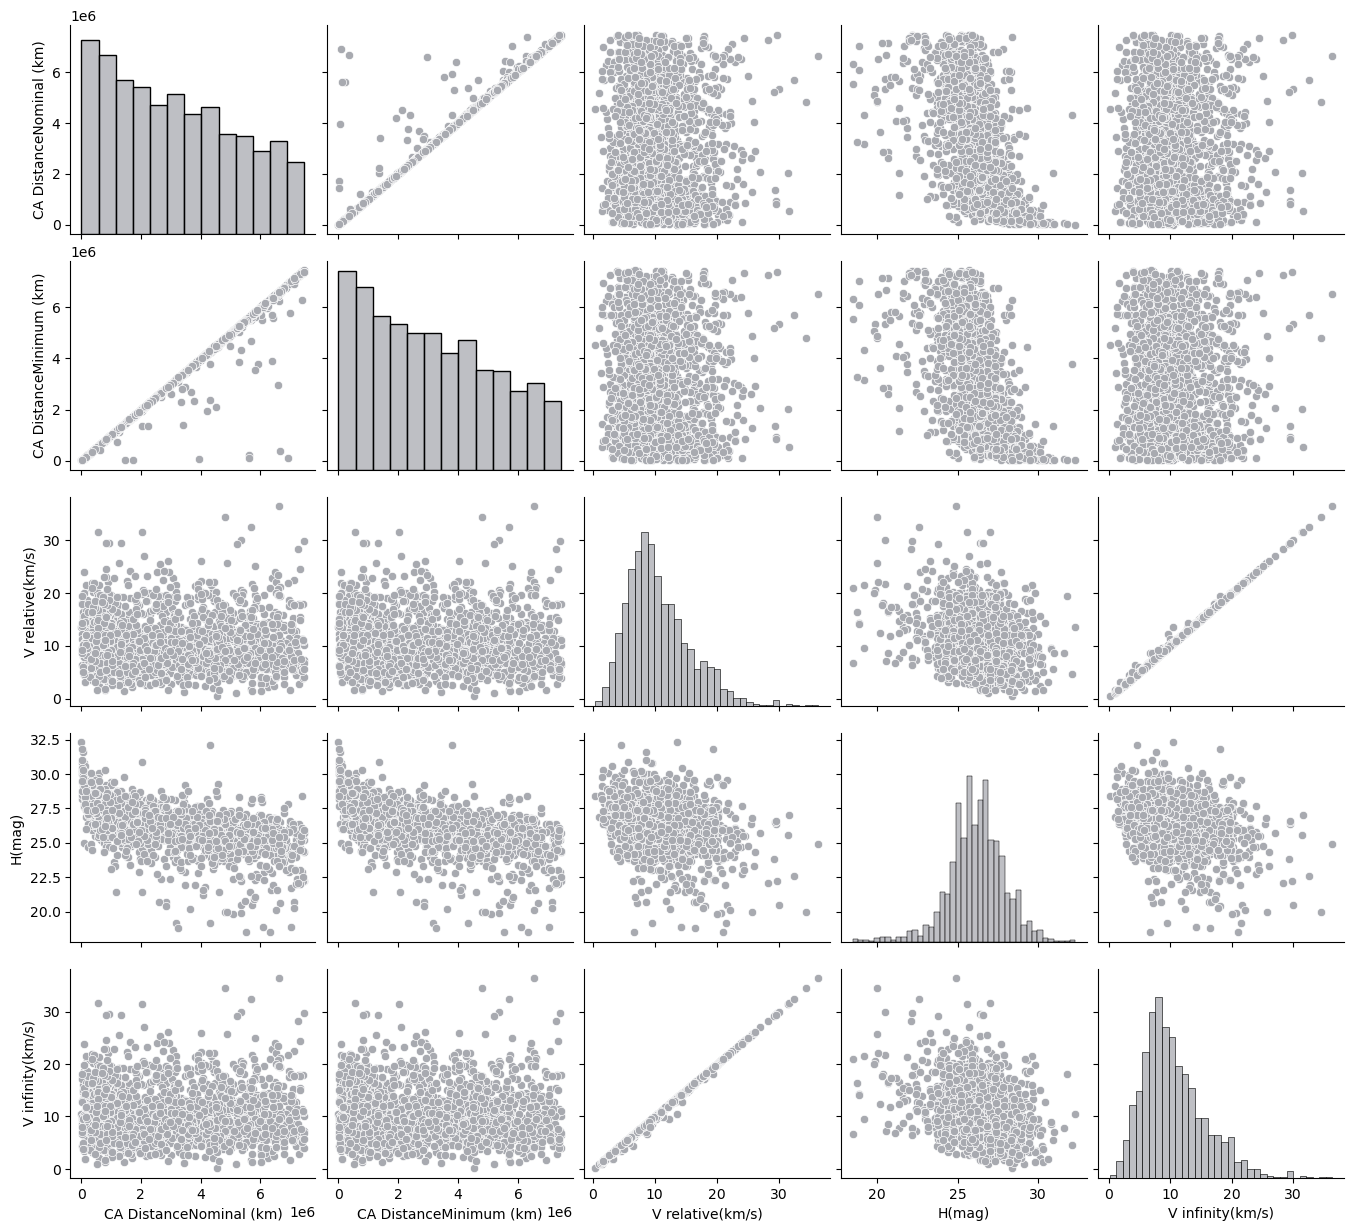

In [34]:
# Define the attributes to be plotted
attr = ["CA DistanceNominal (km)", "CA DistanceMinimum (km)", "V relative(km/s)", "H(mag)", "V infinity(km/s)"]

# Create a pairplot with the custom color
sns.pairplot(data[attr], height=2.5, aspect=1.1, plot_kws={'color': '#a8aab0'}, diag_kws={'color': '#a8aab0'})

# Show the plot
plt.show()

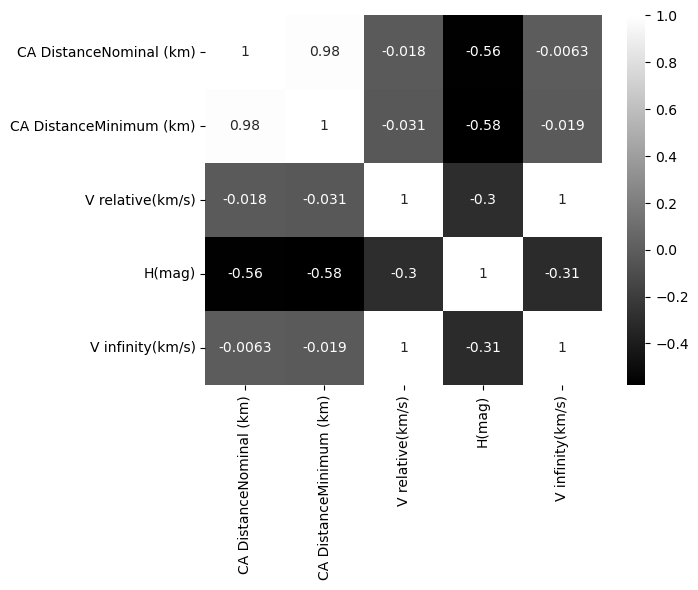

In [35]:
sns.heatmap(data[["CA DistanceNominal (km)", "CA DistanceMinimum (km)", "V relative(km/s)","H(mag)", "V infinity(km/s)"]].corr(), cmap="gray", annot=True)
plt.show()

### removing the outliers

In [9]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
def outliers(df, features):
    filtered_df = df.copy()
    
    for col in features:
        if not filtered_df.empty:
            q1 = np.quantile(filtered_df[col], 0.25)
            q3 = np.quantile(filtered_df[col], 0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
    
    return filtered_df

data = outliers(data, numerical_features)


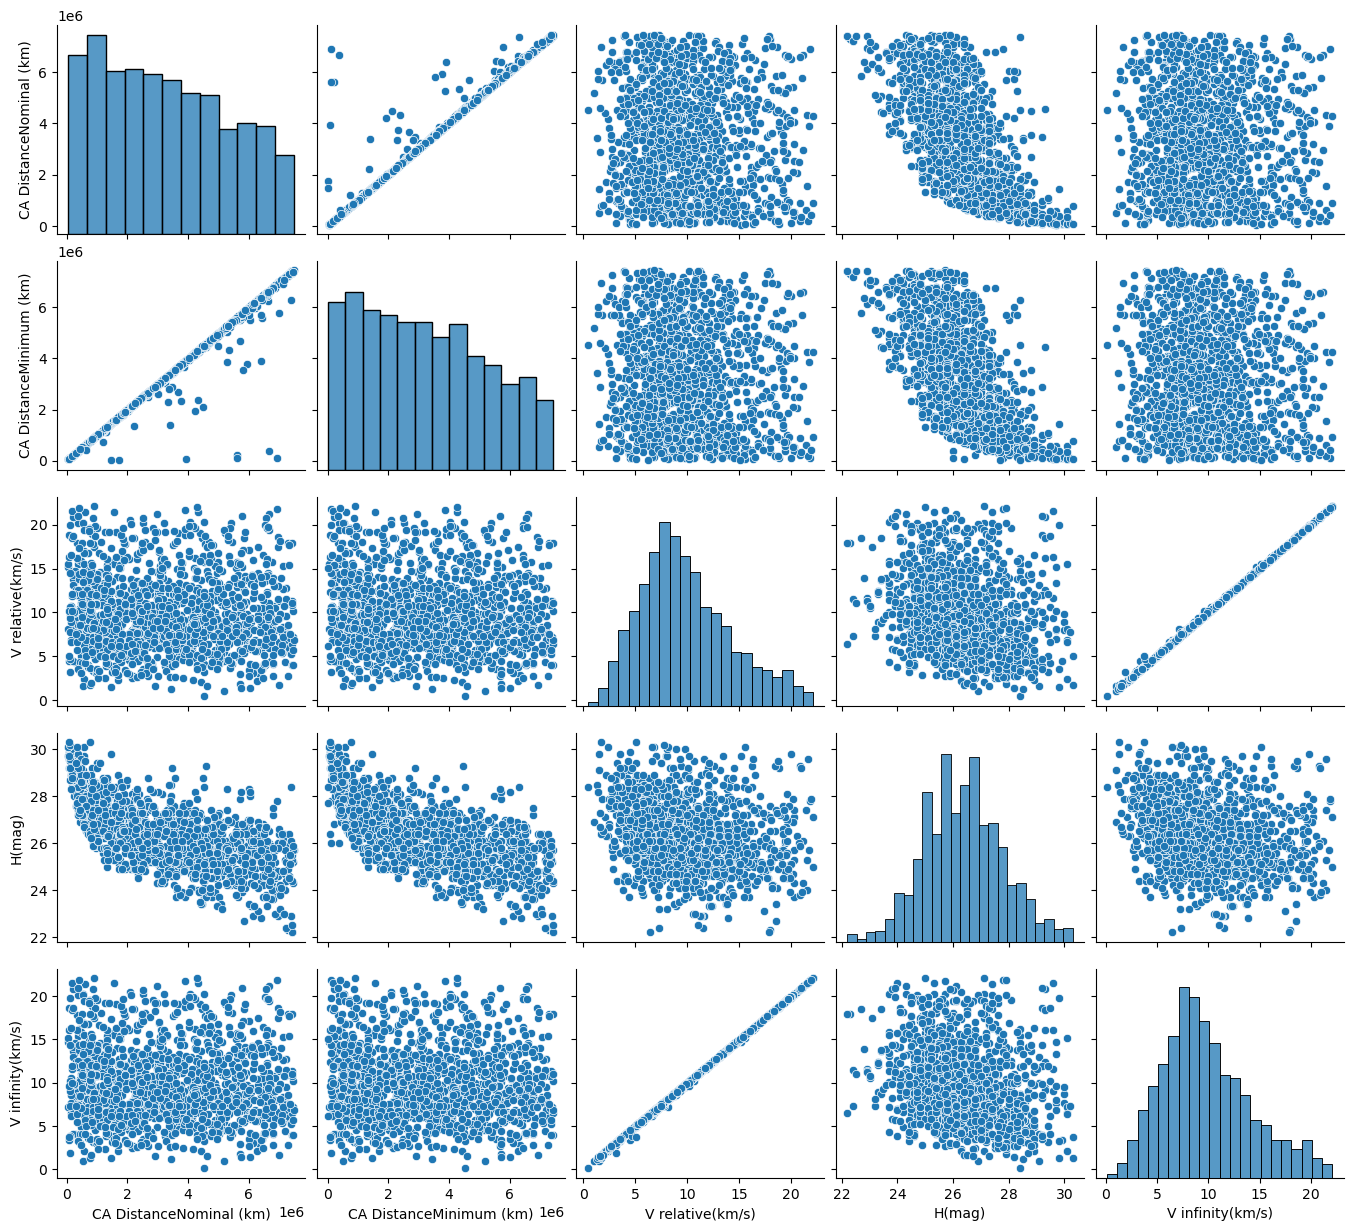

In [10]:
#the plots after 
attr = ["CA DistanceNominal (km)", "CA DistanceMinimum (km)", "V relative(km/s)","H(mag)", "V infinity(km/s)"]
sns.pairplot(data[attr],height=2.5, aspect=1.1)
plt.show()

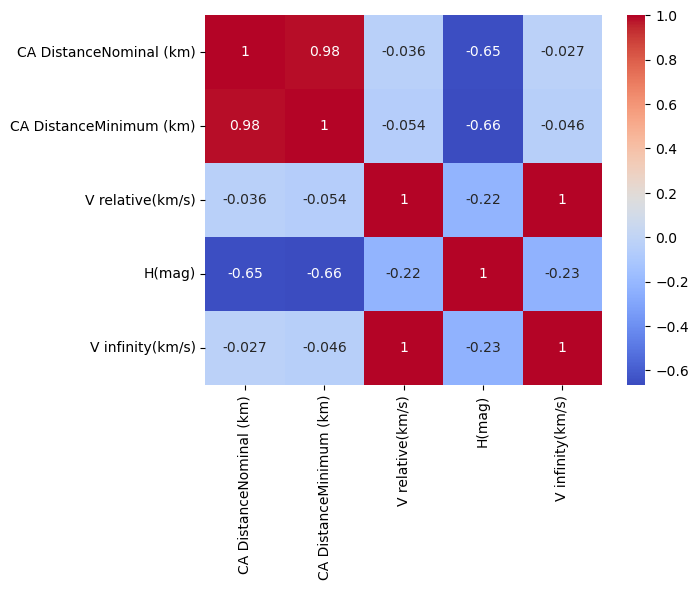

In [11]:
sns.heatmap(data[["CA DistanceNominal (km)", "CA DistanceMinimum (km)", "V relative(km/s)","H(mag)", "V infinity(km/s)"]].corr(), cmap="coolwarm", annot=True)
plt.show()

### Feature engineering 

In [12]:
data[['first', 'last']] = data['Diameter'].str.split('-', 1, expand=True)
# Remove non-numeric characters and convert to integers
data['first'] = data['first'].str.extract('(\d+)').astype(int)
data['last'] = data['last'].str.extract('(\d+)').astype(int)
# Calculate the average
data['average'] = (data['first'] + data['last']) / 2



In [13]:
data['distance_diff'] = data['CA DistanceNominal (km)'] - data['CA DistanceMinimum (km)']
data['distance_ratio'] = data['CA DistanceMinimum (km)'] / data['CA DistanceNominal (km)']


In [14]:
data.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (km),CA DistanceMinimum (km),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity,first,last,average,distance_diff,distance_ratio
0,(2023 JA1),2023-May-03 01:15 ± < 00:01,3766841,3753308,5.01,4.99,26.6,13 m - 29 m,0,13,29,21.0,13533,0.996407
1,(2023 HV5),2023-May-03 03:16 ± < 00:01,434889,434324,8.93,8.82,27.2,9.8 m - 22 m,0,9,22,15.5,565,0.998701
2,(2023 JM2),2023-May-03 05:23 ± < 00:01,5995856,5977807,6.33,6.32,26.0,17 m - 38 m,0,17,38,27.5,18049,0.996990
3,(2023 HF7),2023-May-04 00:02 ± < 00:01,638670,637330,13.10,13.05,26.8,12 m - 26 m,0,12,26,19.0,1340,0.997902
5,(2023 JW4),2023-May-04 08:00 ± 00:04,2701523,2687102,13.31,13.30,26.4,14 m - 32 m,0,14,32,23.0,14421,0.994662


In [15]:
numerical_features = data.select_dtypes(include=[np.number]).columns
data = outliers(data, numerical_features)

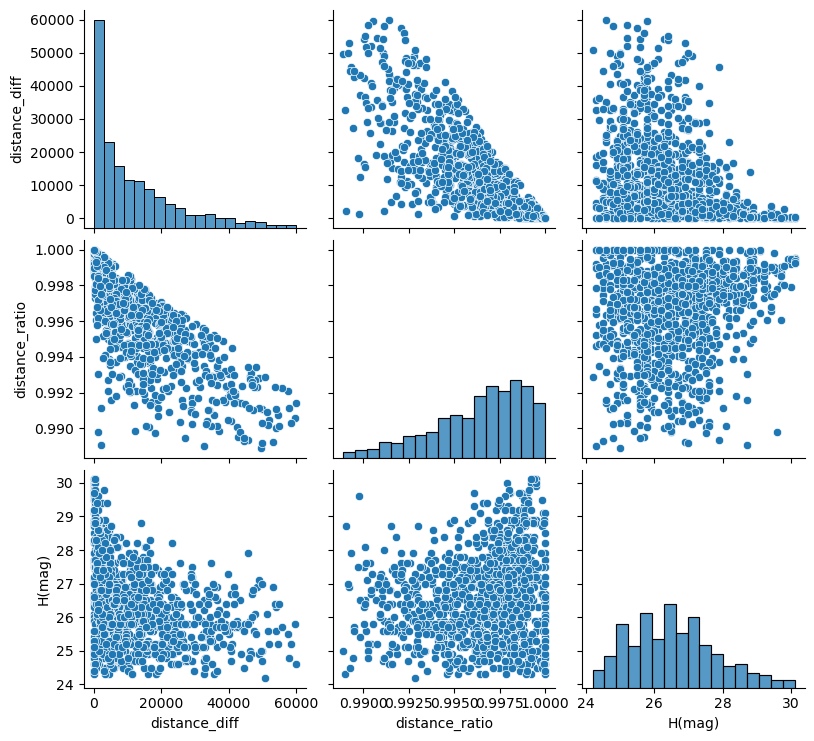

In [16]:
attr = ["distance_diff", "distance_ratio","H(mag)"]
sns.pairplot(data[attr],height=2.5, aspect=1.1)
plt.show()

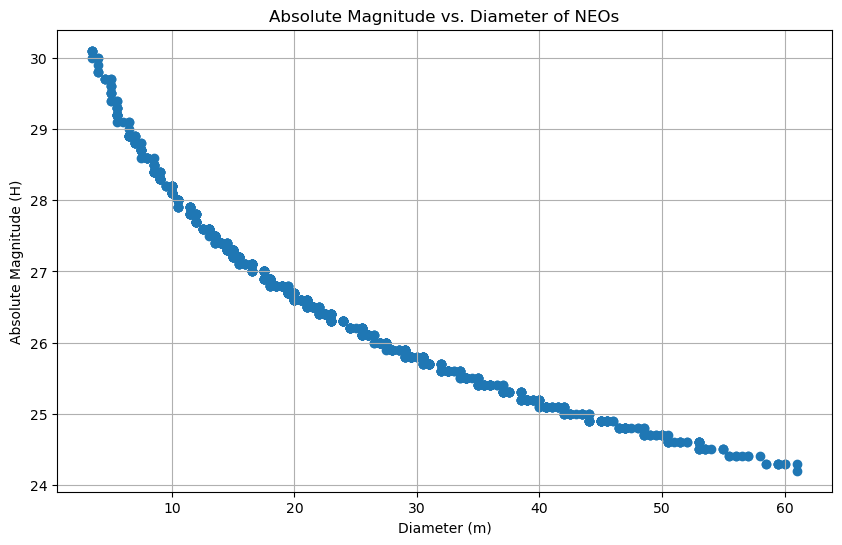

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(data['average'], data['H(mag)'])
plt.xlabel('Diameter (m)')
plt.ylabel('Absolute Magnitude (H)')
plt.title('Absolute Magnitude vs. Diameter of NEOs')
plt.grid(True)
plt.show()

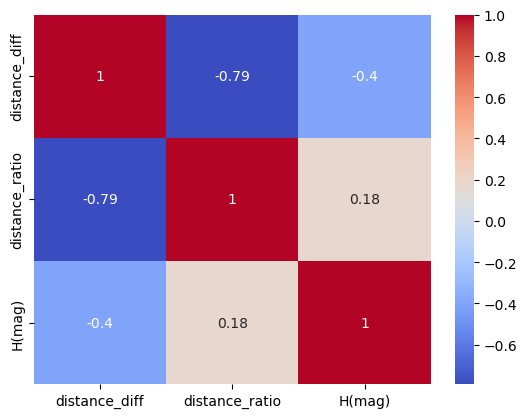

In [18]:
sns.heatmap(data[["distance_diff", "distance_ratio","H(mag)"]].corr(), cmap="coolwarm", annot=True)
plt.show()

In [19]:
data.drop(["distance_diff","distance_ratio","Object","Close-Approach (CA) Date","Diameter"],axis=1,inplace=True)

In [20]:
data.head()

,CA DistanceNominal (km),CA DistanceMinimum (km),V relative(km/s),V infinity(km/s),H(mag),Rarity,first,last,average
0,3766841,3753308,5.01,4.99,26.6,0,13,29,21.0
1,434889,434324,8.93,8.82,27.2,0,9,22,15.5
2,5995856,5977807,6.33,6.32,26.0,0,17,38,27.5
3,638670,637330,13.10,13.05,26.8,0,12,26,19.0
5,2701523,2687102,13.31,13.30,26.4,0,14,32,23.0


# second : Regression

In [21]:
x=data.drop('H(mag)',axis=1)
y=data["H(mag)"]
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [22]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)        

In [23]:
feature_names = np.array(x.columns)
for i in range(1, 7):
    
    forward = SequentialFeatureSelector ( LinearRegression() , n_features_to_select=i+1 , direction="forward" , scoring="r2").fit(x_train_scaled, y_train)

    #select
    features_selected = feature_names[forward.get_support()]
    print(features_selected)
    x_train_selected = x_train[features_selected]
    x_test_selected = x_test[features_selected]
    
    #scale
    scaler = StandardScaler()
    scaler.fit(x_train_selected)
    x_train_scaled_selected = scaler.transform(x_train_selected)
    x_test_scaled_selected = scaler.transform(x_test_selected)
    
    #train
    reg = LinearRegression().fit(x_train_scaled_selected, y_train)
    y_pred_train = reg.predict(x_train_scaled_selected)
    y_pred_test = reg.predict(x_test_scaled_selected)

    #assess
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f'With {i+1} features:')
    print(f'Train score (R2): {reg.score(x_train_scaled_selected, y_train)}')
    print(f'Test score (R2): {reg.score(x_test_scaled_selected, y_test)}')
    print(f'MSE on train: {mse_train}')
    print(f'MSE on test: {mse_test}')
    print("************************************************************")

#select

x_train_selected = x_train[data.columns.drop(["H(mag)"])]
x_test_selected = x_test[data.columns.drop(["H(mag)"])]
    
#scale
scaler = StandardScaler()
scaler.fit(x_train_selected)
x_train_scaled_selected = scaler.transform(x_train_selected)
x_test_scaled_selected = scaler.transform(x_test_selected)
    
#train
reg = LinearRegression().fit(x_train_scaled_selected, y_train)
y_pred_test = reg.predict(x_test_scaled_selected)
y_pred_train = reg.predict(x_train_scaled_selected)
    
#assess
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'With all features:')
print(f'Train score (R2): {reg.score(x_train_scaled_selected, y_train)}')
print(f'Test score (R2): {reg.score(x_test_scaled_selected, y_test)}')
print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')
print("******************************************************************")

['CA DistanceNominal (km)' 'first']
With 2 features:
Train score (R2): 0.9088600019693264
Test score (R2): 0.9134437778418832
MSE on train: 0.14839132130164542
MSE on test: 0.13639674145457784
************************************************************
['CA DistanceNominal (km)' 'CA DistanceMinimum (km)' 'first']
With 3 features:
Train score (R2): 0.9095916141652441
Test score (R2): 0.9134304372960077
MSE on train: 0.14720013298939527
MSE on test: 0.13641776370972356
************************************************************
['CA DistanceNominal (km)' 'CA DistanceMinimum (km)' 'first' 'last']
With 4 features:
Train score (R2): 0.9096890327187306
Test score (R2): 0.9136319660882823
MSE on train: 0.1470415191186084
MSE on test: 0.13610019127079098
************************************************************
['CA DistanceNominal (km)' 'CA DistanceMinimum (km)' 'first' 'last'
 'average']
With 5 features:
Train score (R2): 0.9096890327187307
Test score (R2): 0.9136319660882821
MSE on tra

In [24]:
feature_names = np.array(x.columns)
feature_names

array(['CA DistanceNominal (km)', 'CA DistanceMinimum (km)',
       'V relative(km/s)', 'V infinity(km/s)', 'Rarity', 'first', 'last',
       'average'], dtype=object)

In [25]:
#backward

x_train_selected = x_train[data.columns.drop(["H(mag)","average","V relative(km/s)"])]
x_test_selected = x_test[data.columns.drop(["H(mag)","average","V relative(km/s)"])]
    
#scale
scaler = StandardScaler()
scaler.fit(x_train_selected)
x_train_scaled_selected = scaler.transform(x_train_selected)
x_test_scaled_selected = scaler.transform(x_test_selected)
    
#train
reg = LinearRegression().fit(x_train_scaled_selected, y_train)
y_pred_test = reg.predict(x_test_scaled_selected)
y_pred_train = reg.predict(x_train_scaled_selected)
    
#evaluate
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'With all features average excluding average and V relative(km/s):')
print(f'Train score (R2): {reg.score(x_train_scaled_selected, y_train)}')
print(f'Test score (R2): {reg.score(x_test_scaled_selected, y_test)}')
print(f'MSE on train: {mse_train}')
print(f'MSE on test: {mse_test}')

With all features average excluding average and V relative(km/s):
Train score (R2): 0.9098105829833937
Test score (R2): 0.9136121685556078
MSE on train: 0.14684361474327762
MSE on test: 0.13613138855364748


# cross validation

In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset and split features and labels
x=data.drop('H(mag)',axis=1)
y=data["H(mag)"]
# Define your model
model = LinearRegression()

# Define the number of folds for cross-validation
k = 5  # You can change k to any desired value

# Define the cross-validation method
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared error
mse_scores = -scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", mse_scores)
print("Mean cross-validation MSE score:", np.mean(mse_scores))


Cross-validation MSE scores: [0.0902202  0.10041406 0.11209552 0.12351386 0.1347984 ]
Mean cross-validation MSE score: 0.11220840655033279
